In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## Getting final merged data

In [2]:
#read final merged data 
final_data_townhouse_sold = pd.read_csv('/Users/hp/Projects/zillow/Zillow/townhouse_sold_normalized_price_outlier_removed.csv')



## Data Exploration

Data Exploration is the key to getting insights from data. Practitioners say a good data exploration strategy can solve even complicated problems in a few hours. A good data exploration strategy comprises the following:

--- Univariate Analysis - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.

--- Bivariate Analysis - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.

--- Multivariate Analysis - As the name suggests, it is used to visualize more than two variables at once. Examples: stacked bar chart, dodged bar chart, etc.

--- Cross Tables -They are used to compare the behavior of two categorical variables (used in pivot tables as well).

In [3]:
final_data_townhouse_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 27 columns):
Unnamed: 0          1974 non-null int64
latitude            1974 non-null float64
longitude           1974 non-null float64
address             1974 non-null object
city                1974 non-null object
state               1974 non-null object
zip                 1974 non-null int64
bedrooms            1974 non-null float64
bathrooms           1974 non-null float64
sqft                1973 non-null float64
lot_size            1956 non-null float64
year_built          1966 non-null float64
price               1974 non-null float64
sale_type           1974 non-null object
zestimate           1970 non-null float64
date_sold           1974 non-null object
days_on_zillow      2 non-null float64
house_type          1974 non-null object
url                 1974 non-null object
Parcel_Number       1974 non-null int64
Liquefaction        1974 non-null float64
Landslide           1974 no

In [4]:
#changing date into datetime type and fire hazard type into int
final_data_townhouse_sold['date_sold'] = pd.to_datetime(final_data_townhouse_sold['date_sold'])


In [5]:
final_data_townhouse_sold.columns[final_data_townhouse_sold.isnull().any()]

Index(['sqft', 'lot_size', 'year_built', 'zestimate', 'days_on_zillow',
       'normalized_perc'],
      dtype='object')

In [6]:
#missing value counts in each of these columns
total = final_data_townhouse_sold.isnull().sum().sort_values(ascending=False)
percent = (final_data_townhouse_sold.isnull().sum()/final_data_townhouse_sold.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total']>0]
missing_data


,Total,Percent
days_on_zillow,1972,0.998987
lot_size,18,0.009119
year_built,8,0.004053
normalized_perc,4,0.002026
zestimate,4,0.002026
sqft,1,0.000507


Text(0.5, 1.0, 'Percent missing data by feature')

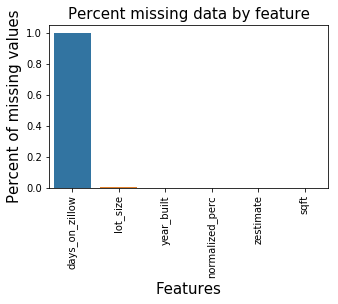

In [7]:
#visualising missing values
f, ax = plt.subplots(figsize=(5, 3))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [8]:
final_data_townhouse_sold['year_built'].describe()

count    1966.000000
mean     1989.829095
std        15.271997
min      1900.000000
25%      1976.000000
50%      1988.000000
75%      2005.000000
max      2018.000000
Name: year_built, dtype: float64

In [9]:
final_data_townhouse_sold['bedrooms'].describe()

count    1974.000000
mean        2.736069
std         0.685633
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: bedrooms, dtype: float64

In [10]:
final_data_townhouse_sold['bathrooms'].describe()

count    1974.000000
mean        2.496960
std         0.744291
min         1.000000
25%         2.000000
50%         2.500000
75%         3.000000
max         5.000000
Name: bathrooms, dtype: float64

In [11]:
# filling year_built column with median value 
final_data_townhouse_sold['year_built'].fillna(final_data_townhouse_sold['year_built'].median(), inplace=True)

In [12]:
final_data_townhouse_sold['year_built'].isnull().nunique()

1

In [13]:
#deleting bedrooms equal to zero
final_data_townhouse_sold = final_data_townhouse_sold[final_data_townhouse_sold['bedrooms']>0]

In [14]:
#checking missing values in bedrooms,bathrooms and sqft
sd = final_data_townhouse_sold[final_data_townhouse_sold['bedrooms'].isnull() & final_data_townhouse_sold['bathrooms'].isnull() & final_data_townhouse_sold['sqft'].isnull()]
sd


,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc


In [15]:
gh = final_data_townhouse_sold[final_data_townhouse_sold['sqft'].isnull() & final_data_townhouse_sold['lot_size'].isnull()]
gh

,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
1666,11558,37.366449,-121.864916,1899 DOBBIN DR,SAN JOSE,CA,95133,4.0,3.0,NaN,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,25489051,1.0,0.0,0,0,853000.0,32664.0,3.981783


In [16]:
#deleting missing sqft
final_data_townhouse_sold.dropna(subset=['sqft'], inplace=True)

In [17]:
final_data_townhouse_sold=final_data_townhouse_sold.sort_values(by=['sqft'])


In [18]:
final_data_townhouse_sold[['bedrooms','bathrooms']] = final_data_townhouse_sold[['bedrooms','bathrooms']].fillna(method='ffill')
final_data_townhouse_sold

,Unnamed: 0,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
725,7994,37.340962,-121.893870,1 E JULIAN ST UNIT 107,SAN JOSE,CA,95112,1.0,1.0,547.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,24983002,1.0,0.0,0,0,570000.0,262487.0,31.530462
399,7256,37.401749,-121.885536,2423 JUBILEE LN,SAN JOSE,CA,95131,1.0,1.0,645.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,24432137,1.0,0.0,0,0,408000.0,116684.0,22.238910
379,7191,37.242537,-121.868551,3300 LA TERRACE CIR,SAN JOSE,CA,95123,1.0,1.0,650.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,69442026,1.0,0.0,0,0,390000.0,128210.0,24.740935
896,8446,37.363502,-121.913352,1550 TECHNOLOGY DR UNIT 1041,SAN JOSE,CA,95110,1.0,1.0,665.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,23053028,1.0,0.0,0,0,630000.0,14072.0,2.184849
360,7134,37.361835,-121.910087,1421 N 1ST ST UNIT 153,SAN JOSE,CA,95112,1.0,1.0,674.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,23028017,1.0,0.0,0,0,360000.0,215341.0,37.428412
597,7687,37.312971,-121.951092,801 S WINCHESTER BLVD APT 6400,SAN JOSE,CA,95128,1.0,1.0,692.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,29958121,0.0,0.0,0,0,512000.0,147414.0,22.355303
989,8777,37.300669,-122.029007,7135 RAINBOW DR APT 4,SAN JOSE,CA,95129,1.0,1.0,700.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,37237177,0.0,0.0,0,0,660000.0,235882.0,26.329584
366,7158,37.312028,-121.879126,275 STONEGATE CIR,SAN JOSE,CA,95110,2.0,1.0,704.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,43435071,1.0,0.0,0,0,370000.0,128151.0,25.725332
542,7556,37.375169,-121.851018,659 DEVLIN CT,SAN JOSE,CA,95133,1.0,1.0,720.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,25463015,0.0,0.0,0,0,490000.0,69799.0,12.468582
350,7049,37.254120,-121.826870,275 TRADEWINDS DR APT 4,SAN JOSE,CA,95123,1.0,1.0,722.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,69033004,1.0,0.0,0,0,320000.0,97885.0,23.423908


In [19]:
# filling lot_size column with median value 
final_data_townhouse_sold['lot_size'].fillna(final_data_townhouse_sold['lot_size'].median(), inplace=True)

In [20]:
final_data_townhouse_sold['year_built'] = final_data_townhouse_sold['year_built'].astype(int)

In [21]:
import math
import time

date_sold_month = []
date_sold_year = []

for index, row in final_data_townhouse_sold.iterrows():

    dat_str = str(row['date_sold'])
    if dat_str == 'NaT':
        date_sold_month.append(float('nan'))
        date_sold_year.append(float('nan'))
    else:
        yymmdd,seconds = dat_str.split(' ')
        yy,mm,dd = dat_str.split('-')
        date_sold_month.append(mm)
        date_sold_year.append(yy)


final_data_townhouse_sold['date_sold_month'] = date_sold_month
final_data_townhouse_sold['date_sold_year'] = date_sold_year


In [22]:
final_data_townhouse_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 725 to 277
Data columns (total 29 columns):
Unnamed: 0          1973 non-null int64
latitude            1973 non-null float64
longitude           1973 non-null float64
address             1973 non-null object
city                1973 non-null object
state               1973 non-null object
zip                 1973 non-null int64
bedrooms            1973 non-null float64
bathrooms           1973 non-null float64
sqft                1973 non-null float64
lot_size            1973 non-null float64
year_built          1973 non-null int64
price               1973 non-null float64
sale_type           1973 non-null object
zestimate           1969 non-null float64
date_sold           1973 non-null datetime64[ns]
days_on_zillow      2 non-null float64
house_type          1973 non-null object
url                 1973 non-null object
Parcel_Number       1973 non-null int64
Liquefaction        1973 non-null float64
Landslide           

In [23]:
final_data_townhouse_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/townhouse_sold_for_model.csv')


In [24]:
final_data_townhouse_sold.shape

(1973, 29)

In [25]:
#missing value counts in each of these columns
total = final_data_townhouse_sold.isnull().sum().sort_values(ascending=False)
percent = (final_data_townhouse_sold.isnull().sum()/final_data_townhouse_sold.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
days_on_zillow,1971,0.998986
zestimate,4,0.002027
normalized_perc,4,0.002027


In [26]:
final_data_townhouse_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 725 to 277
Data columns (total 29 columns):
Unnamed: 0          1973 non-null int64
latitude            1973 non-null float64
longitude           1973 non-null float64
address             1973 non-null object
city                1973 non-null object
state               1973 non-null object
zip                 1973 non-null int64
bedrooms            1973 non-null float64
bathrooms           1973 non-null float64
sqft                1973 non-null float64
lot_size            1973 non-null float64
year_built          1973 non-null int64
price               1973 non-null float64
sale_type           1973 non-null object
zestimate           1969 non-null float64
date_sold           1973 non-null datetime64[ns]
days_on_zillow      2 non-null float64
house_type          1973 non-null object
url                 1973 non-null object
Parcel_Number       1973 non-null int64
Liquefaction        1973 non-null float64
Landslide           

In [27]:
%matplotlib inline
import folium
import webbrowser
from mpl_toolkits.basemap import Basemap

In [28]:
def generateBaseMap(default_location=[37.335480, -121.893028], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [29]:
li=final_data_townhouse_sold[final_data_townhouse_sold['Liquefaction']==1]
la=final_data_townhouse_sold[final_data_townhouse_sold['Landslide']==1]
fa=final_data_townhouse_sold[final_data_townhouse_sold['Faultzone']==1]
li_la_fa = final_data_townhouse_sold[(final_data_townhouse_sold['Faultzone']==1)&(final_data_townhouse_sold['Liquefaction']==1)&(final_data_townhouse_sold['Landslide']==1)]


len(li_la_fa)

0

In [30]:
base_map_fault=generateBaseMap()

i = 1
for lat, lon in zip(fa['latitude'],fa['longitude']):
    if (i < len(fa)):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='black', fill=True).add_to(base_map_fault)
base_map_fault

In [31]:
base_map_landslide=generateBaseMap()

i = 1
for lat, lon in zip(la['latitude'],la['longitude']):
    if (i < len(la)):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='green', fill=True).add_to(base_map_landslide)
base_map_landslide

In [32]:
base_map_liquefaction=generateBaseMap()

i = 1
for lat, lon in zip(li['latitude'],li['longitude']):
    if (i < 3000):
        i = i+1
        folium.Circle([lat,lon], radius=1,color='blue', fill=True).add_to(base_map_liquefaction)
base_map_liquefaction

## Which is the most common house (Bedroom wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

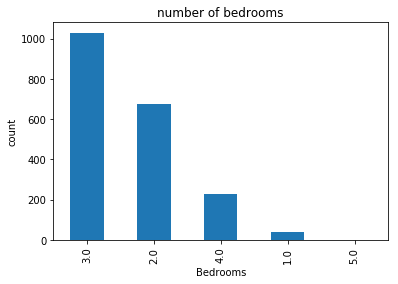

In [33]:
final_data_townhouse_sold['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

## Which is the most common house (Bathrooms wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

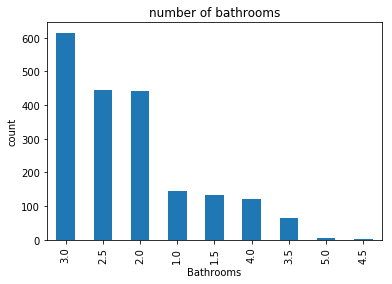

In [34]:
final_data_townhouse_sold['bathrooms'].value_counts().plot(kind='bar')
plt.title('number of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('count')
sns.despine

## Which is the most sold house (Zip wise) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

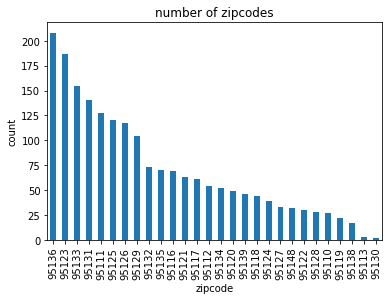

In [35]:
final_data_townhouse_sold['zip'].value_counts().plot(kind='bar')
plt.title('number of zipcodes')
plt.xlabel('zipcode')
plt.ylabel('count')
sns.despine

In [36]:
final_data_townhouse_sold.normalized_price.describe()

count    1.973000e+03
mean     7.844106e+05
std      2.443310e+05
min      2.950000e+05
25%      6.120000e+05
50%      7.550000e+05
75%      9.200000e+05
max      2.040000e+06
Name: normalized_price, dtype: float64

In [37]:
max(final_data_townhouse_sold.normalized_price)

2040000.0

In [38]:
min(final_data_townhouse_sold.normalized_price)

295000.0

final_data_townhouse_sold.groupby('zip')['normalized_price'].mean().plot.bar(figsize=(10,10))
plt.ylabel('Average Price')
plt.title('Average Price of House in different Zipcodes')
plt.tight_layout()


In [39]:
#to work with price group, create a list of price group to use as a bins
#create a new column with column label 'price_bin'
bins = [300000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1600000,2000000,2500000]
final_data_townhouse_sold['price_bin']= pd.cut(final_data_townhouse_sold['normalized_price'], bins)


In [40]:
# check how many houses belong to different price range
final_data_townhouse_sold.price_bin.value_counts().sort_index()

(300000, 500000]      226
(500000, 600000]      241
(600000, 700000]      313
(700000, 800000]      377
(800000, 900000]      282
(900000, 1000000]     210
(1000000, 1100000]    120
(1100000, 1200000]     87
(1200000, 1300000]     51
(1300000, 1600000]     54
(1600000, 2000000]     10
(2000000, 2500000]      1
Name: price_bin, dtype: int64

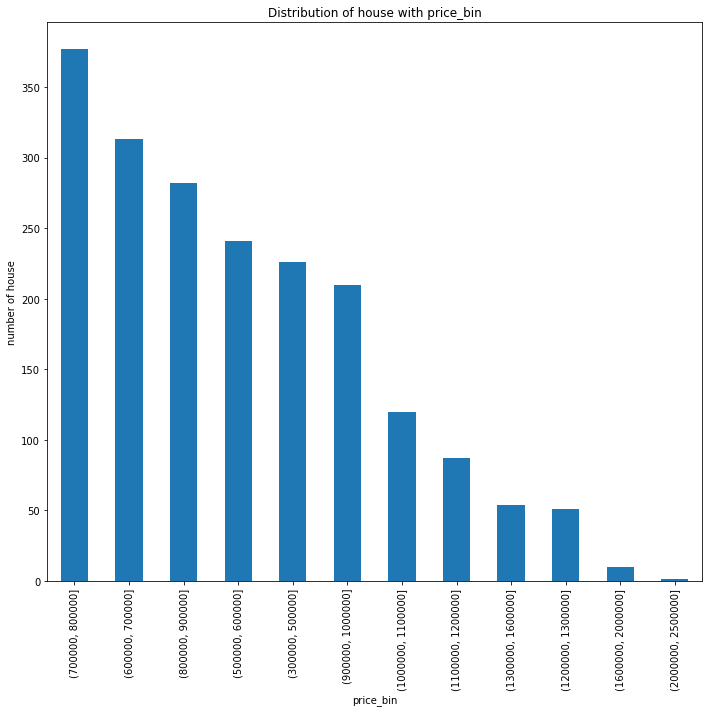

In [41]:
# Most of the house are priced 1.0M to 1.1M
# There are only 5 houses which has price less than 400,000
# There are 3 houses which has price 4M to 6M
final_data_townhouse_sold.price_bin.value_counts().plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.xlabel('price_bin')
plt.title('Distribution of house with price_bin')
plt.tight_layout()


In [42]:
final_data_townhouse_sold[['price','normalized_price','zestimate','price_bin']].head()

,price,normalized_price,zestimate,price_bin
725,570000.0,570000.0,832487.0,"(500000, 600000]"
399,408000.0,408000.0,524684.0,"(300000, 500000]"
379,390000.0,390000.0,518210.0,"(300000, 500000]"
896,630000.0,630000.0,644072.0,"(600000, 700000]"
360,360000.0,360000.0,575341.0,"(300000, 500000]"


In [43]:
group_price = final_data_townhouse_sold.groupby('price_bin').median()
group_price[['bedrooms','bathrooms','sqft','year_built','zip','zestimate','price','normalized_price','Liquefaction','Landslide','Faultzone','fire_hazard',]]
             
             

,bedrooms,bathrooms,sqft,year_built,zip,zestimate,price,normalized_price,Liquefaction,Landslide,Faultzone,fire_hazard
price_bin,,,,,,,,,,,,
"(300000, 500000]",2.0,1.5,1000.0,1976.5,95121.0,543241.5,445000.0,445000.0,1.0,0.0,0.0,0.0
"(500000, 600000]",2.0,2.0,1180.0,1980.0,95123.0,660383.0,553200.0,553200.0,1.0,0.0,0.0,0.0
"(600000, 700000]",3.0,2.5,1340.0,1985.0,95131.0,760100.0,653000.0,653000.0,1.0,0.0,0.0,0.0
"(700000, 800000]",3.0,2.5,1408.0,1993.0,95126.0,875129.5,750000.0,750000.0,1.0,0.0,0.0,0.0
"(800000, 900000]",3.0,3.0,1533.5,2001.0,95126.0,955877.5,850000.0,850000.0,1.0,0.0,0.0,0.0
"(900000, 1000000]",3.0,3.0,1601.0,2002.0,95129.0,985690.0,950000.0,950000.0,0.0,0.0,0.0,0.0
"(1000000, 1100000]",3.0,3.0,1668.0,2000.0,95129.0,1046003.5,1050000.0,1050000.0,0.0,0.0,0.0,0.0
"(1100000, 1200000]",3.0,3.0,1601.0,2000.0,95129.0,1119953.0,1160000.0,1160000.0,0.0,0.0,0.0,0.0
"(1200000, 1300000]",3.0,3.0,1602.0,1989.0,95129.0,1191410.0,1240000.0,1240000.0,0.0,0.0,0.0,0.0


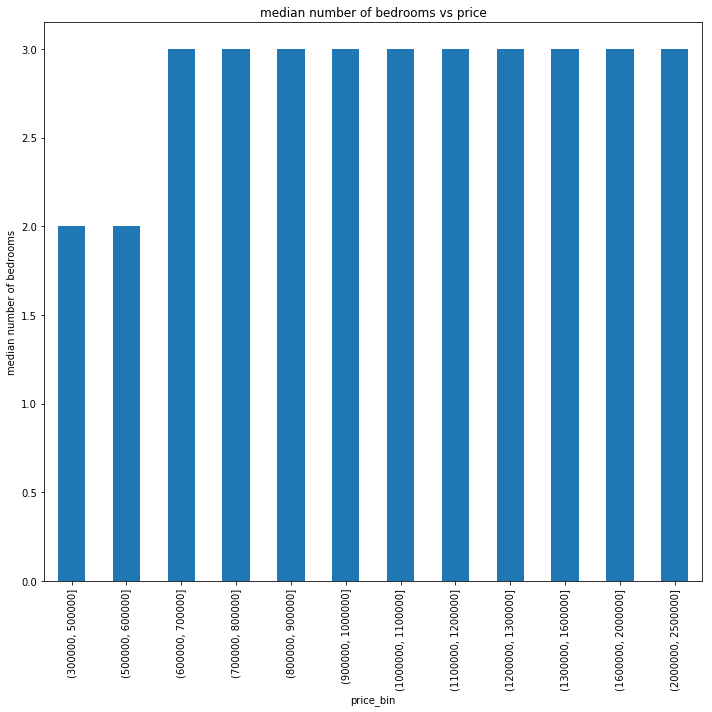

In [44]:
# Houses 1600,000 to 2000,000 has median 3 bedrooms
# Houses priced less than 500,000 has median 2 bedrooms
# Houses with more bedrooms are more expensive
# Houses with less bedrooms are less expensive
group_price.bedrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bedrooms')
plt.title('median number of bedrooms vs price')
plt.tight_layout()


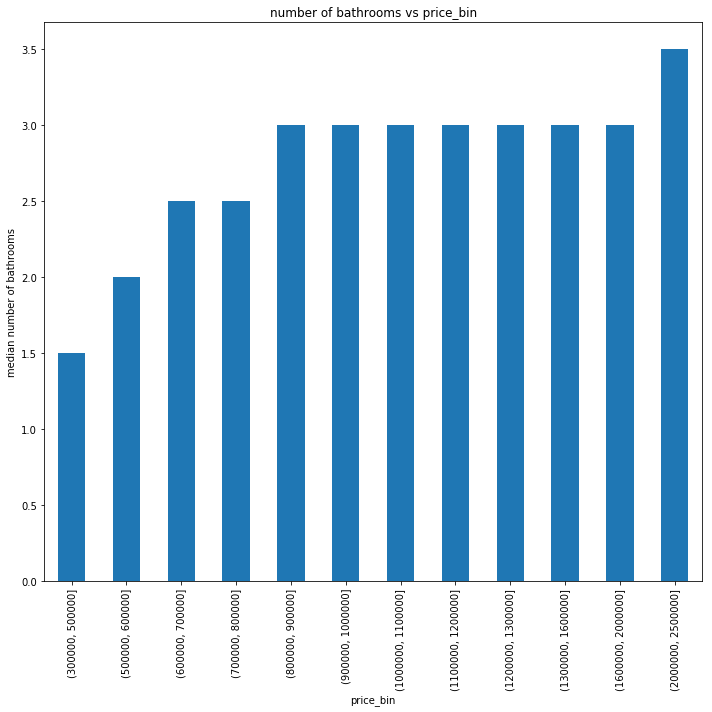

In [45]:
 # Houses 1600,000 to 2000,000 has median 5 bathrooms
# Houses priced less than 400,000 has median 1 bathroom
# Houses with more bathrooms are more expensive
# Houses with less bathrooms are less expensive
group_price.bathrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bathrooms')
plt.title('number of bathrooms vs price_bin')
plt.tight_layout()


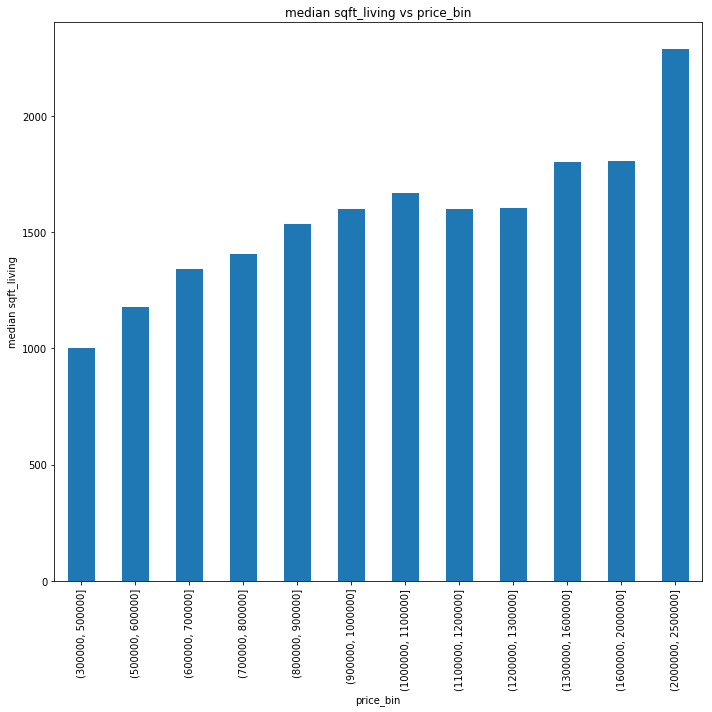

In [46]:
# Houses with larger sqft_living are more expensive
# Houses with less sqft_living are less expensive
group_price.sqft.plot.bar(figsize=(10,10))
plt.ylabel('median sqft_living')
plt.title('median sqft_living vs price_bin')
plt.tight_layout()


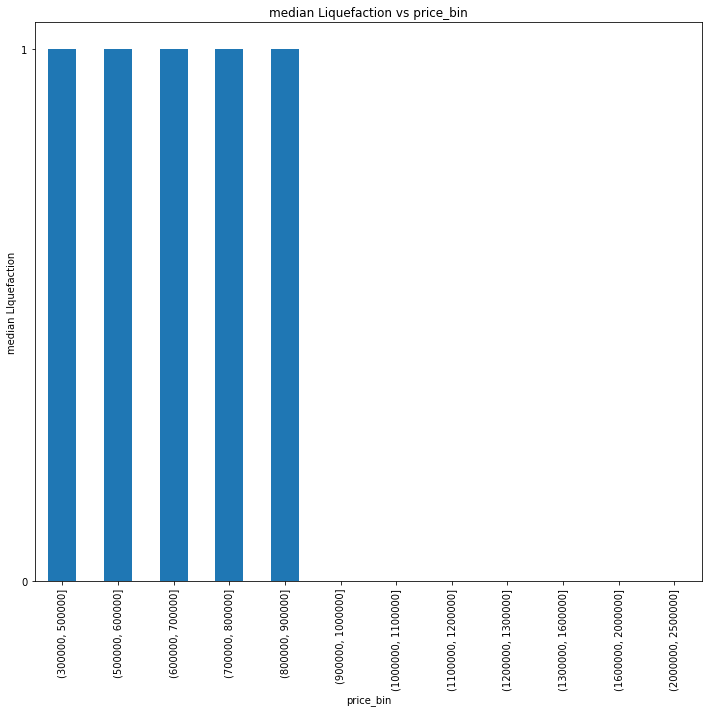

In [47]:

group_price.Liquefaction.plot.bar(figsize=(10,10))
plt.ylabel('median LIquefaction')
plt.title('median Liquefaction vs price_bin')
plt.yticks([0,1])
plt.tight_layout()


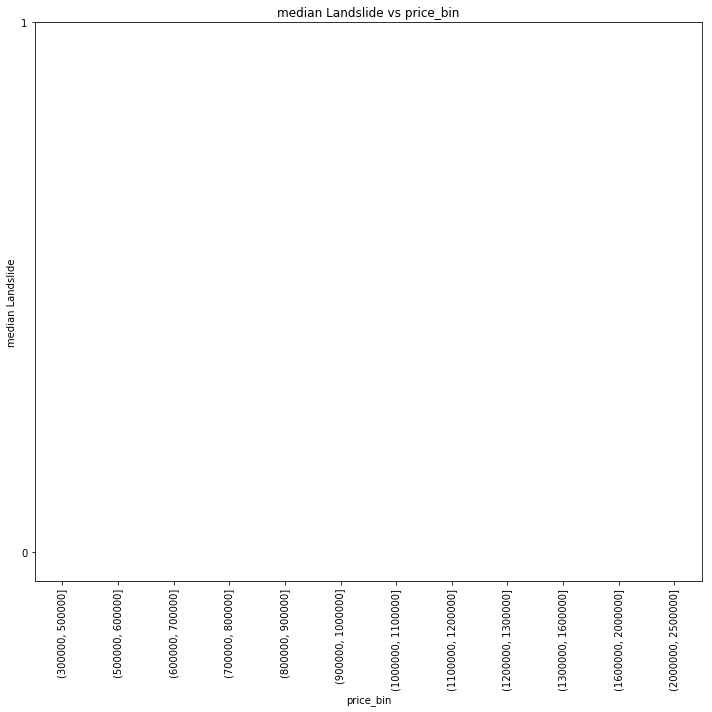

In [48]:
group_price.fire_hazard.plot.bar(figsize=(10,10))
plt.ylabel('median Landslide')
plt.title('median Landslide vs price_bin')
plt.yticks([0,1])
plt.tight_layout()

## Which is the most common house (year built) ?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

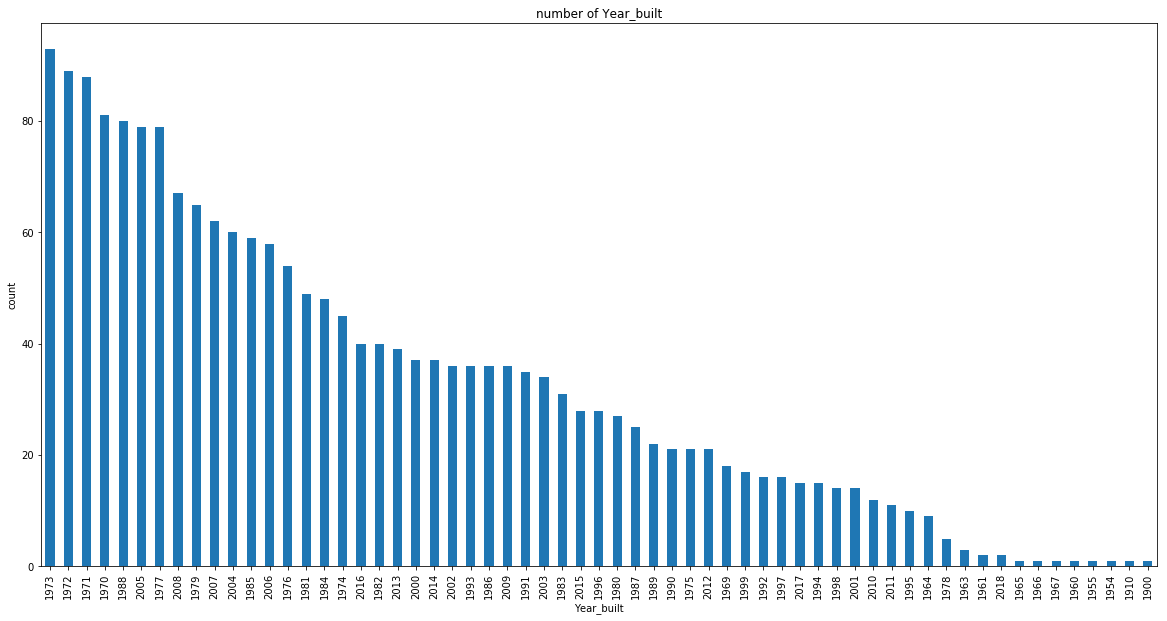

In [49]:
plt.figure(figsize=(20,10))
final_data_townhouse_sold['year_built'].value_counts().plot(kind='bar')
plt.title('number of Year_built')
plt.xlabel('Year_built')
plt.ylabel('count')
plt.xticks(rotation=90)
sns.despine

## Which is the most common hazard ?

/Users/hp/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


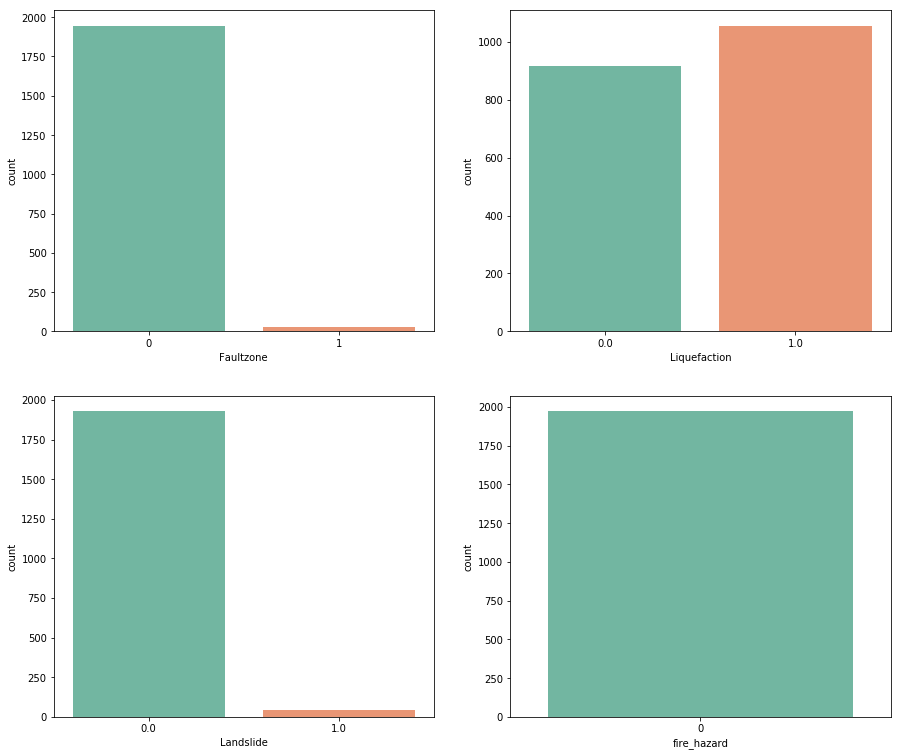

In [50]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey=False, figsize=(15,13))
g =sns.countplot(x="Faultzone", data=final_data_townhouse_sold, palette="Set2",ax=axes[0][0])
g =sns.countplot(x="Liquefaction", data=final_data_townhouse_sold, palette="Set2",ax=axes[0][1])
g =sns.countplot(x="Landslide", data=final_data_townhouse_sold, palette="Set2",ax=axes[1][0])
g =sns.countplot(x="fire_hazard", data=final_data_townhouse_sold, palette="Set2",ax=axes[1][1])
fig.show()


## which month is best for selling house?

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

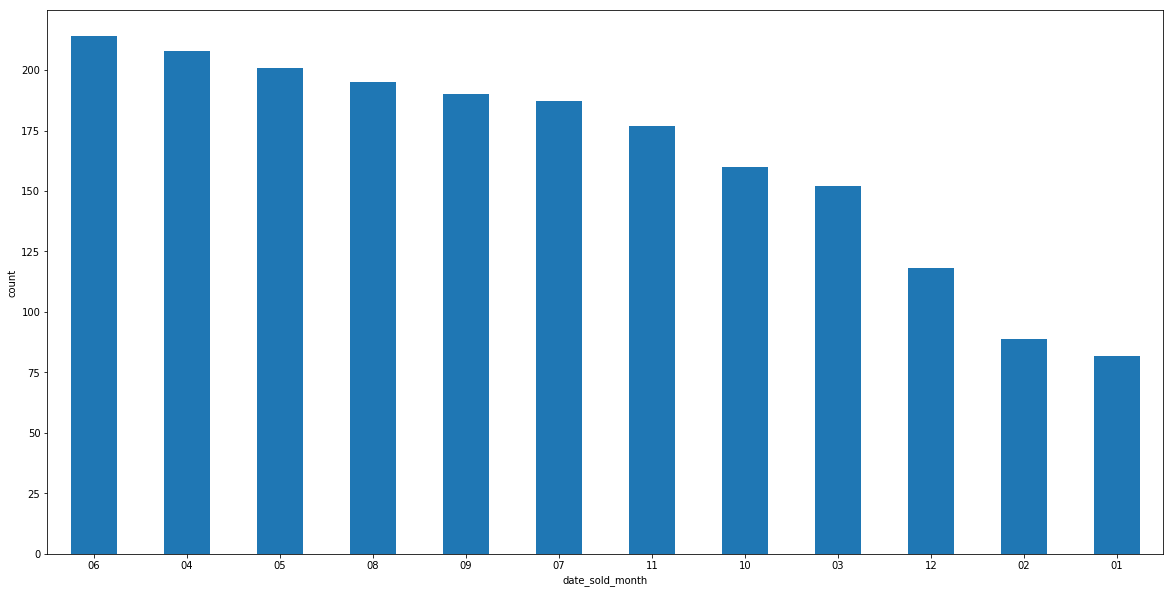

In [51]:
plt.figure(figsize=(20,10))
final_data_townhouse_sold['date_sold_month'].value_counts().plot(kind='bar')
plt.xlabel('date_sold_month')
plt.ylabel('count')
plt.xticks(rotation=0)
sns.despine

## which year has most house solded?

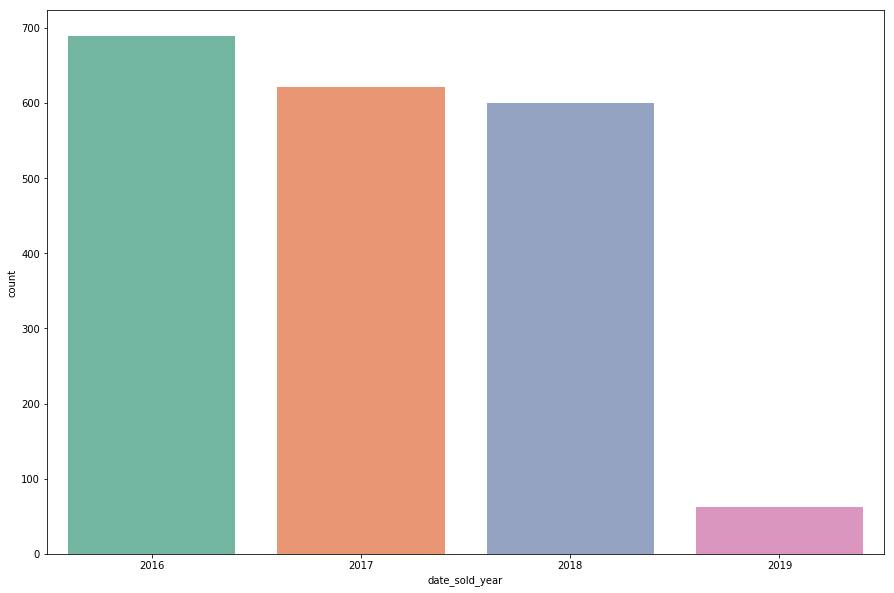

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(x="date_sold_year", data=final_data_townhouse_sold, palette="Set2")

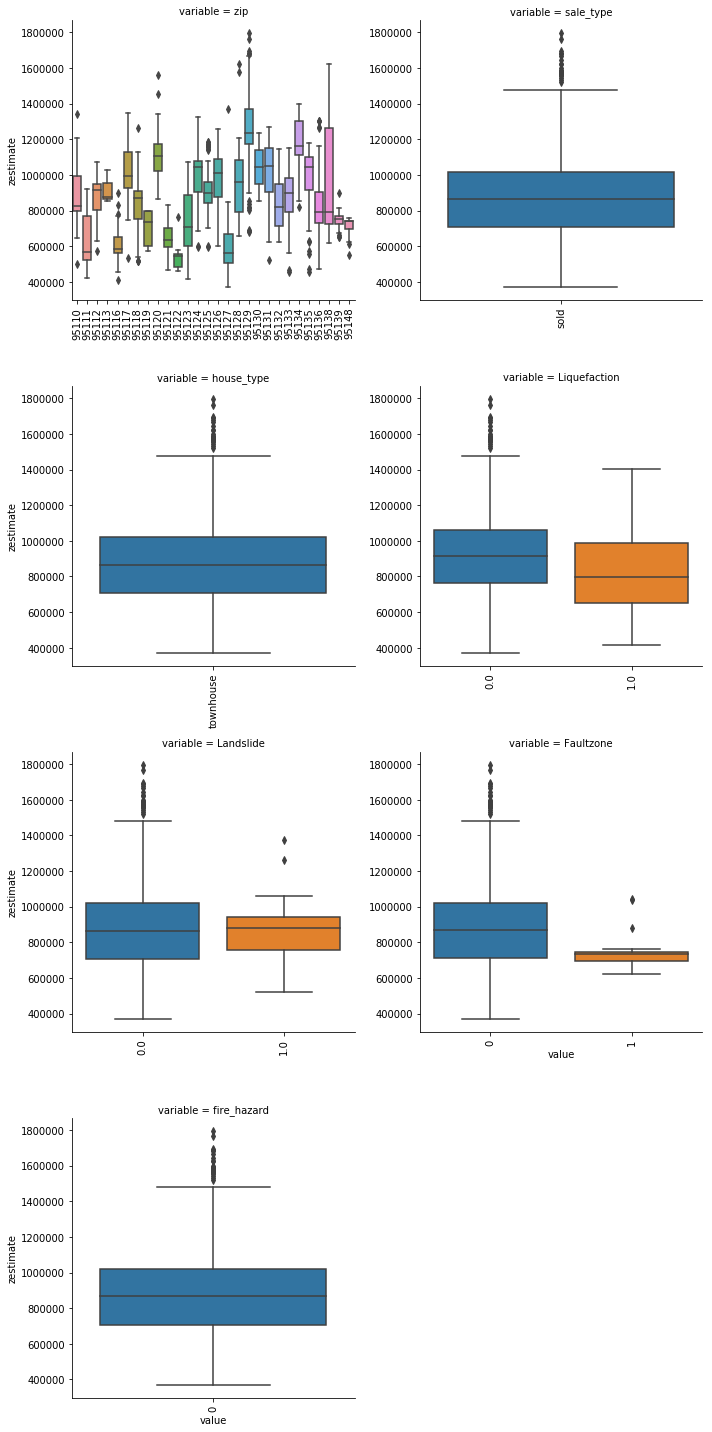

In [53]:
#qualitative = [f for f in final_data_townhouse_sold.columns if final_data_townhouse_sold.dtypes[f] == 'object']
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_townhouse_sold, id_vars=['zestimate'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "zestimate")


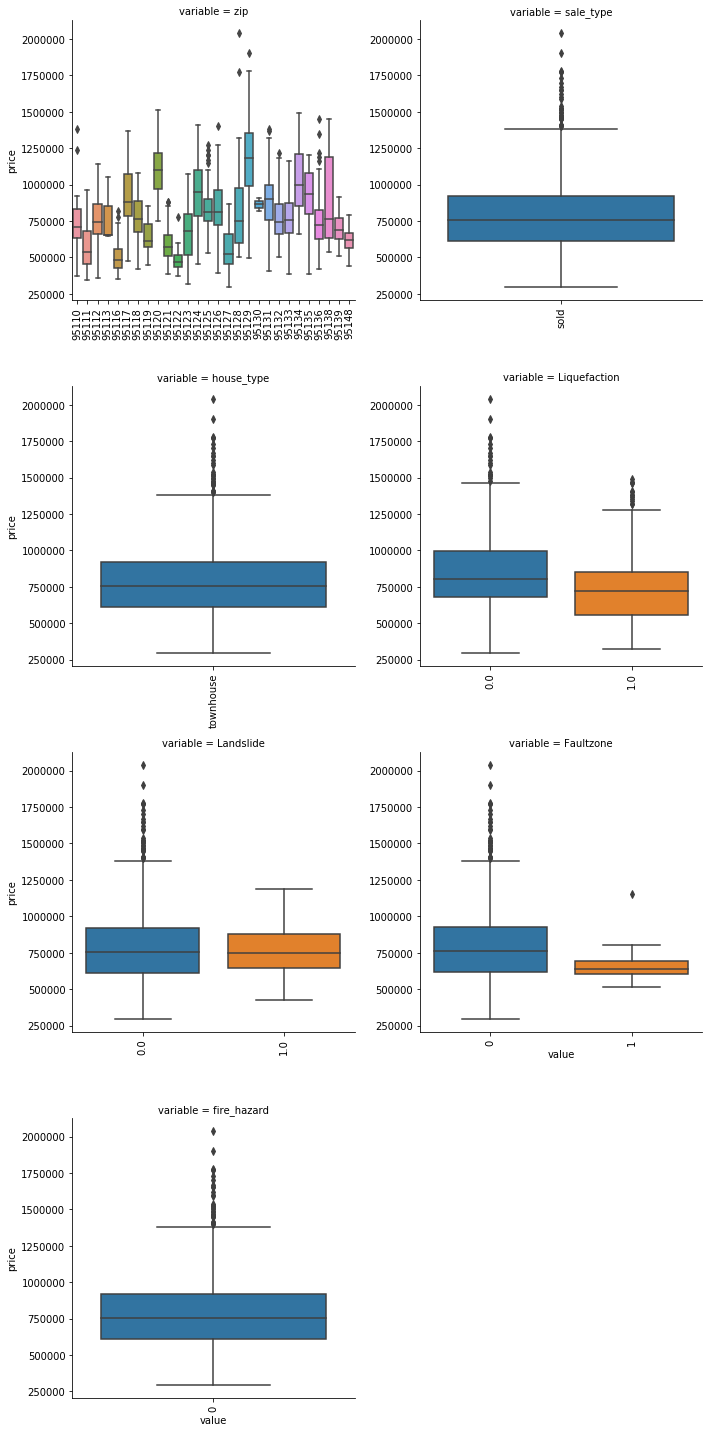

In [54]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_townhouse_sold, id_vars=['price'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "price")


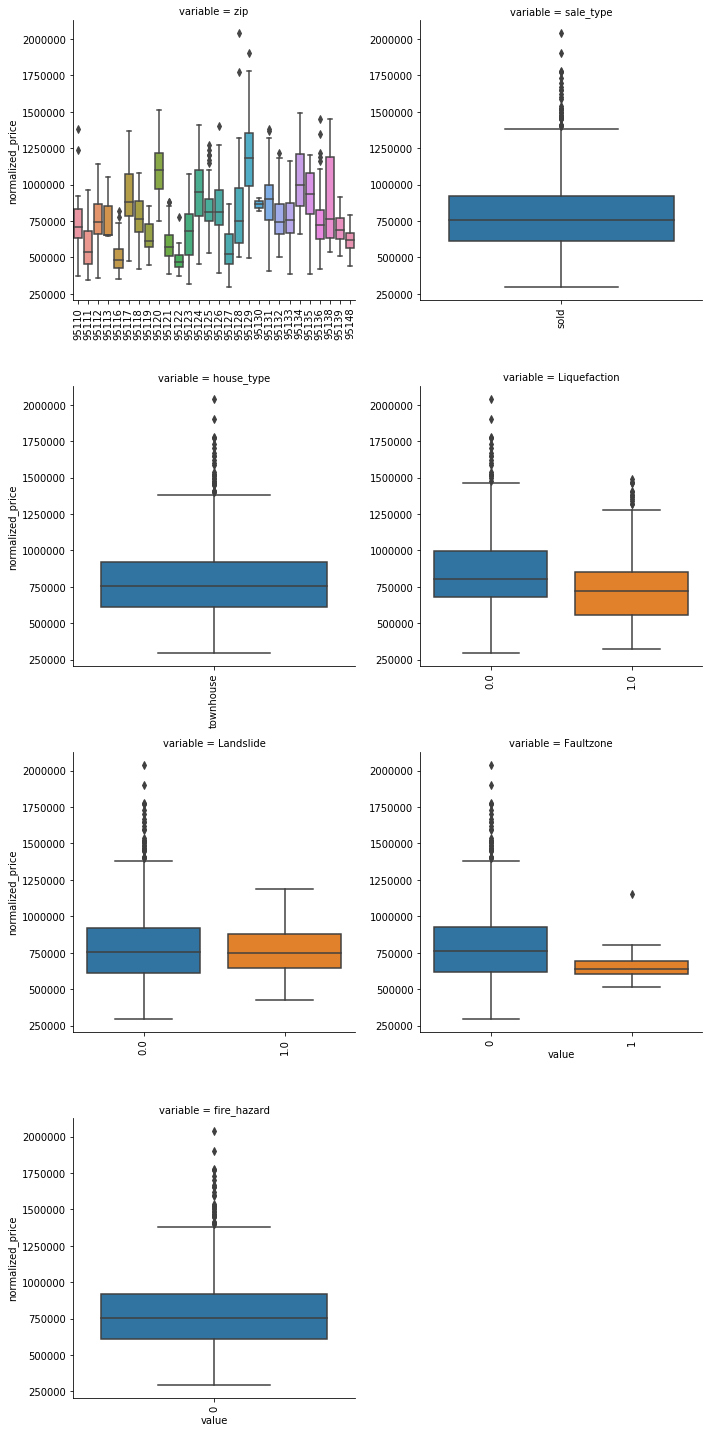

In [55]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(final_data_townhouse_sold, id_vars=['normalized_price'], value_vars=['zip','sale_type','house_type','Liquefaction','Landslide','Faultzone','fire_hazard'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "normalized_price")


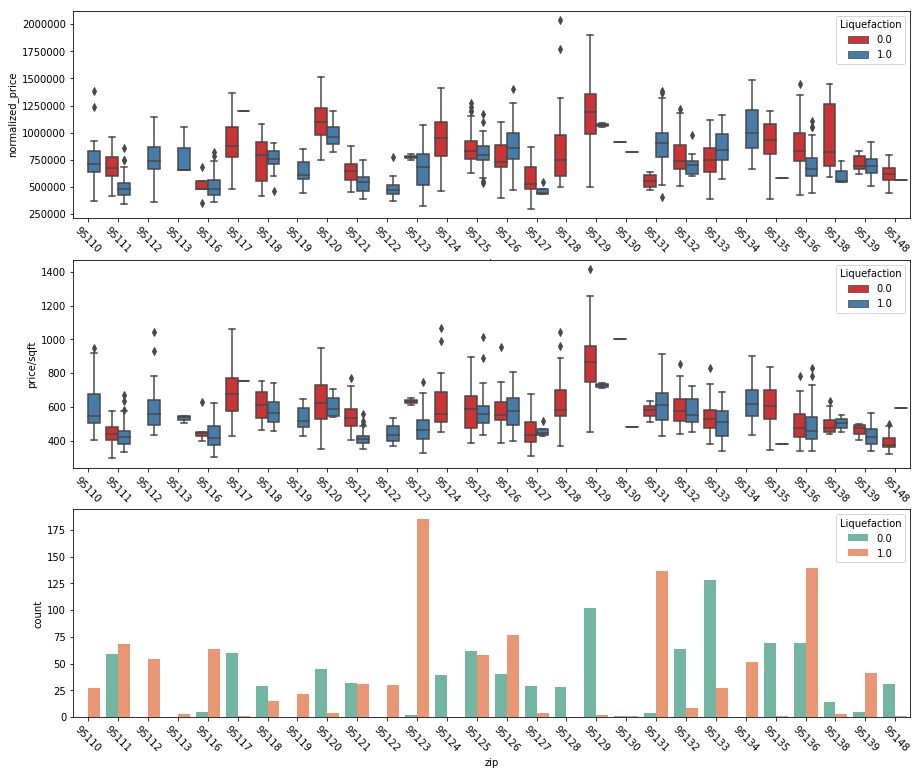

In [56]:
# library and dataset
import seaborn as sns

er = final_data_townhouse_sold
er['price/sqft'] = final_data_townhouse_sold['normalized_price']/final_data_townhouse_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Liquefaction", data=final_data_townhouse_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Liquefaction", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Liquefaction", data=final_data_townhouse_sold, palette="Set2",ax=axes[2])



In [57]:
he =final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95116) & (final_data_townhouse_sold['Liquefaction']==0)]
be = final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95127) & (final_data_townhouse_sold['Liquefaction']==1)]



In [58]:
he['normalized_price'].describe()

count         5.000000
mean     509600.000000
std      121520.780116
min      352000.000000
25%      480000.000000
50%      480000.000000
75%      551000.000000
max      685000.000000
Name: normalized_price, dtype: float64

In [59]:
be['normalized_price'].describe()

count         4.000000
mean     466250.000000
std       53281.485215
min      430000.000000
25%      436000.000000
50%      445000.000000
75%      475250.000000
max      545000.000000
Name: normalized_price, dtype: float64

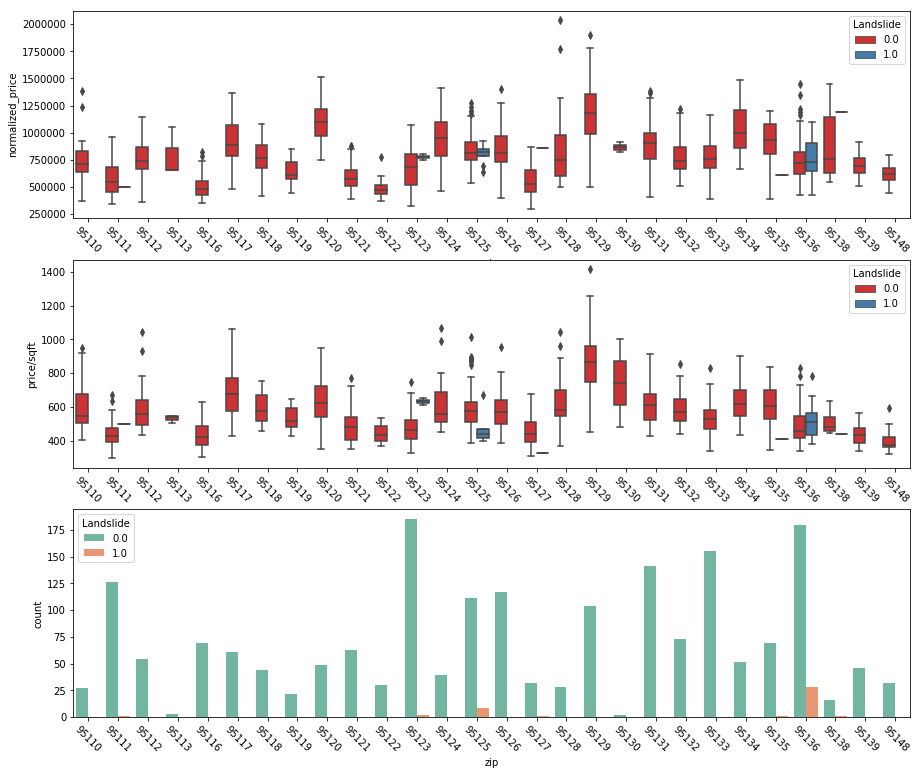

In [60]:
# library and dataset
import seaborn as sns

er = final_data_townhouse_sold
er['price/sqft'] = final_data_townhouse_sold['normalized_price']/final_data_townhouse_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Landslide", data=final_data_townhouse_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Landslide", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Landslide", data=final_data_townhouse_sold, palette="Set2",ax=axes[2])






In [61]:
df =final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95136) & (final_data_townhouse_sold['Landslide']==1)]
cd = final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95148) & (final_data_townhouse_sold['Landslide']==0)]


In [62]:
cd['normalized_price'].describe()

count        32.000000
mean     622521.500000
std       81328.496484
min      438000.000000
25%      563125.000000
50%      618500.000000
75%      670000.000000
max      790000.000000
Name: normalized_price, dtype: float64

In [63]:
df['normalized_price'].describe()

count    2.800000e+01
mean     7.718348e+05
std      1.698395e+05
min      4.250000e+05
25%      6.435000e+05
50%      7.290000e+05
75%      9.012500e+05
max      1.100000e+06
Name: normalized_price, dtype: float64

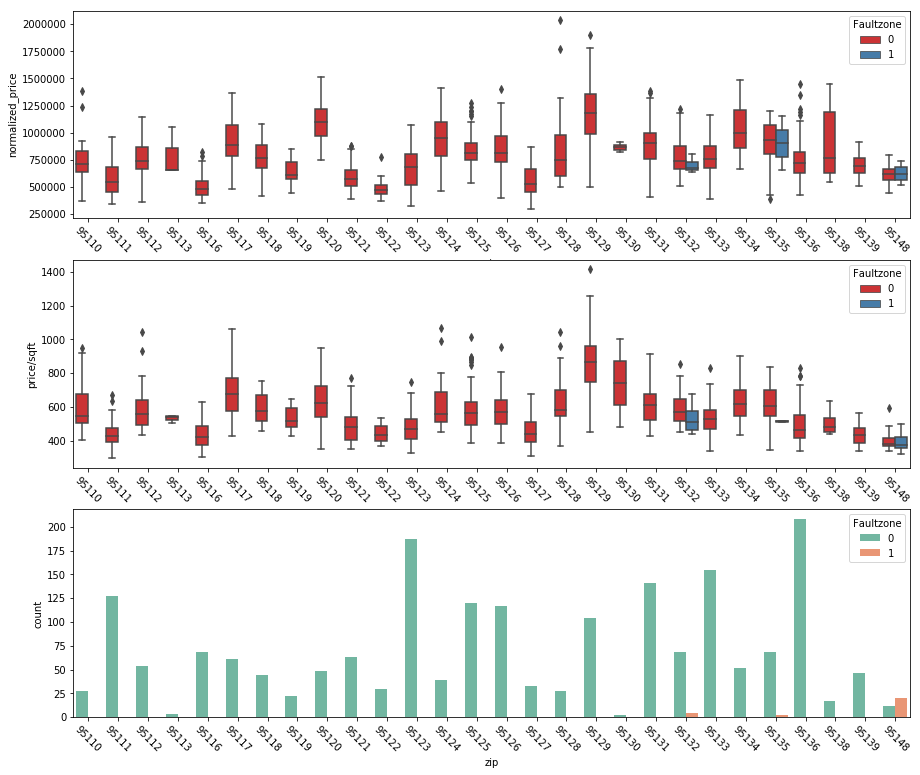

In [64]:
# library and dataset
import seaborn as sns

er = final_data_townhouse_sold
er['price/sqft'] = final_data_townhouse_sold['normalized_price']/final_data_townhouse_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="Faultzone", data=final_data_townhouse_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="Faultzone", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="Faultzone", data=final_data_townhouse_sold, palette="Set2",ax=axes[2])


In [65]:
ki =final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95138) & (final_data_townhouse_sold['Faultzone']==0)]
lo = final_data_townhouse_sold[(final_data_townhouse_sold['zip']==95148) & (final_data_townhouse_sold['Faultzone']==1)]



In [66]:
ki['normalized_price'].describe()

count    1.700000e+01
mean     8.985882e+05
std      3.265949e+05
min      5.400000e+05
25%      6.300000e+05
50%      7.620000e+05
75%      1.190000e+06
max      1.450000e+06
Name: normalized_price, dtype: float64

In [67]:
lo['normalized_price'].describe()

count        20.000000
mean     623884.400000
std       69119.552446
min      518000.000000
25%      557375.000000
50%      618500.000000
75%      685000.000000
max      735000.000000
Name: normalized_price, dtype: float64

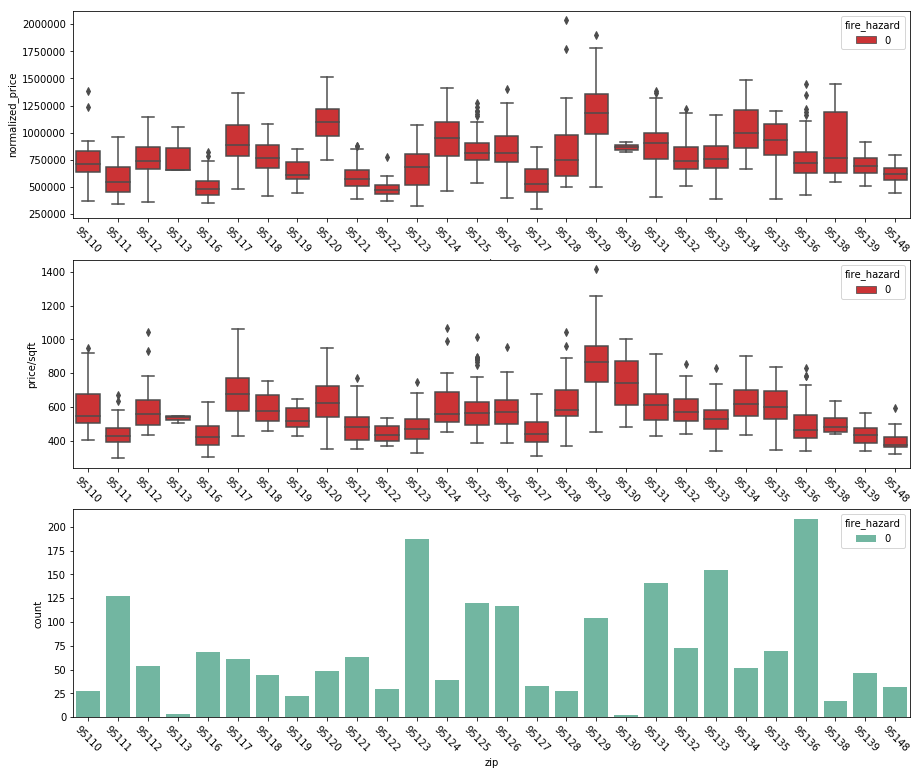

In [68]:
# library and dataset
import seaborn as sns

er = final_data_townhouse_sold
er['price/sqft'] = final_data_townhouse_sold['normalized_price']/final_data_townhouse_sold['sqft']

fig, axes = plt.subplots(nrows=3, sharey=False, figsize=(15,13))

[plt.setp(ax.get_xticklabels(), rotation=-45) for ax in axes]
g = sns.boxplot(x="zip", y="normalized_price", hue="fire_hazard", data=final_data_townhouse_sold, palette="Set1", ax=axes[0])
g = sns.boxplot(x="zip", y="price/sqft", hue="fire_hazard", data=er, palette="Set1", ax=axes[1])
g =sns.countplot(x="zip", hue="fire_hazard", data=final_data_townhouse_sold, palette="Set2",ax=axes[2])


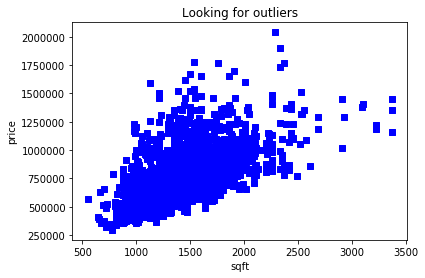

In [69]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(final_data_townhouse_sold.sqft, final_data_townhouse_sold.price, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()



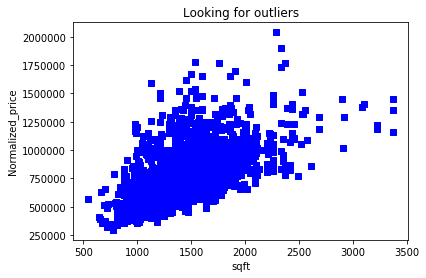

In [70]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(final_data_townhouse_sold.sqft, final_data_townhouse_sold.normalized_price, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("sqft")
plt.ylabel("Normalized_price")
plt.show()


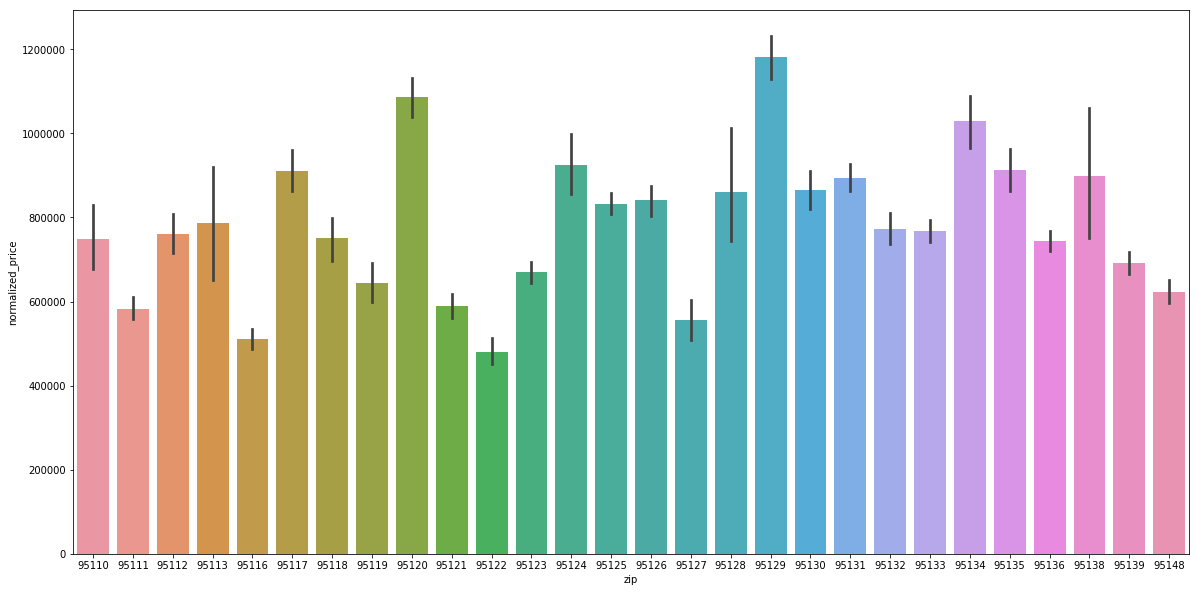

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(final_data_townhouse_sold.zip,final_data_townhouse_sold.normalized_price)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

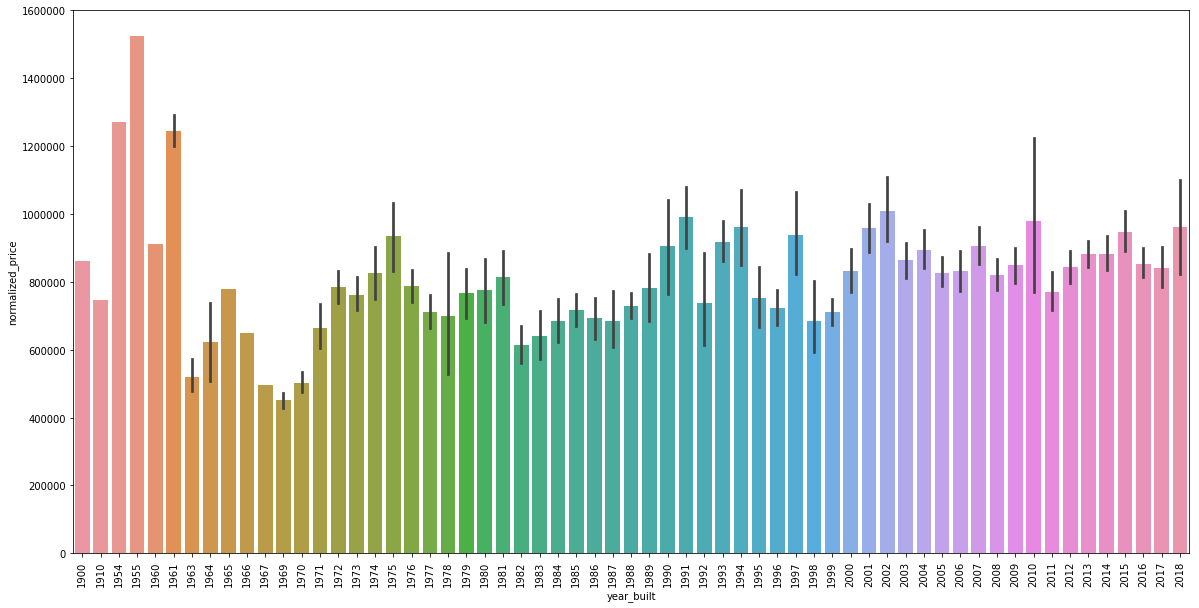

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(final_data_townhouse_sold.year_built,final_data_townhouse_sold.normalized_price)
plt.xticks(rotation=90)


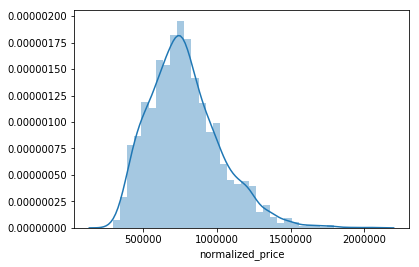

In [73]:
#SoldPrice
sns.distplot(final_data_townhouse_sold['normalized_price'])

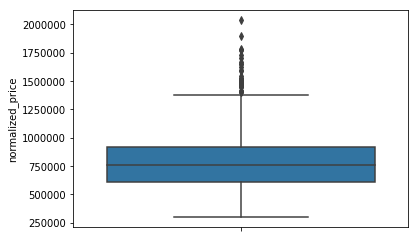

In [74]:
#outliers
import seaborn as sns
sns.boxplot(y=final_data_townhouse_sold['normalized_price'])

In [75]:
final_data_townhouse_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/final_data_townhouse_sold.csv')